In [1]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [2]:
%pip install pydlm

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [3]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [4]:
%pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
#import data
df = pd.read_csv('../Datasets/NVDA Historical Data.csv')

#print data 
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,1/3/2017,25.50,26.10,26.59,24.84,150.20M,-4.42%
1,1/4/2017,26.10,25.85,26.38,25.38,119.92M,2.35%
2,1/5/2017,25.43,26.13,26.45,25.26,98.43M,-2.57%
3,1/6/2017,25.77,25.71,26.06,25.30,82.29M,1.34%
4,1/9/2017,26.82,25.88,27.00,25.88,91.62M,4.07%


In [7]:
#Bỏ dòng bị trống dự liệu
df = df.dropna()
#Chuyển đổi dữ liệu cột Vol. sang số
df['Vol.'] = df['Vol.'].str.replace('M', '').astype(float) * 1000000


In [8]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,1/3/2017,25.50,26.10,26.59,24.84,150200000.0,-4.42%
1,1/4/2017,26.10,25.85,26.38,25.38,119920000.0,2.35%
2,1/5/2017,25.43,26.13,26.45,25.26,98430000.0,-2.57%
3,1/6/2017,25.77,25.71,26.06,25.30,82290000.0,1.34%
4,1/9/2017,26.82,25.88,27.00,25.88,91620000.0,4.07%
...,...,...,...,...,...,...,...
1606,5/22/2023,311.76,309.01,315.20,306.80,36970000.0,-0.28%
1607,5/23/2023,306.88,310.00,312.88,306.31,35470000.0,-1.57%
1608,5/24/2023,305.38,302.10,306.07,298.06,55280000.0,-0.49%
1609,5/25/2023,379.80,385.23,394.80,366.35,153460000.0,24.37%


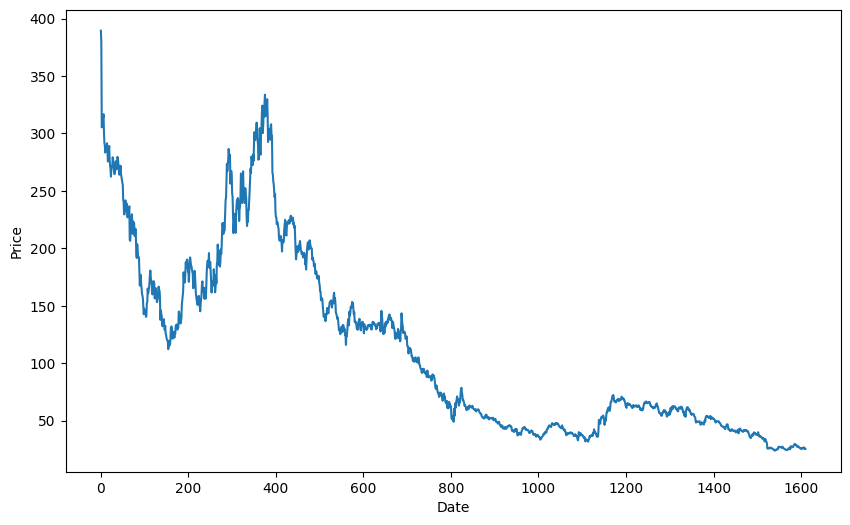

In [9]:
#Đảo ngược dữ liệu cho mô hình
df = df[::-1]

figure=df['Price'].values
plt.figure(figsize=(10,6))
plt.plot(figure)
plt.xlabel('Date')
plt.ylabel('Price') 
plt.show()

In [10]:
#Xây dựng mô hỉnh với Bayesian Dynamic Linear Model
from pydlm import dlm, trend, seasonality, dynamic, autoReg, longSeason


In [11]:
df = df.reset_index(drop=True)
 # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [12]:
from pydlm import dlm, trend, seasonality

# Tạo model DLM
my_dlm = dlm(train_data['Price'])

# Thêm trend component
my_dlm = my_dlm + trend(degree=1, name='trend', w=1.0)

# Thêm seasonality component với chu kỳ 52 tuần
my_dlm = my_dlm + seasonality(period=52, name='season', w=1.0)

In [13]:

# Fit the DLM to the training data
my_dlm.fit()


Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


In [14]:
# Predict on validation set
my_dlm.predictN(N=30)


([30.082956640740093,
  30.11919069893982,
  30.043910345366577,
  29.259549440255324,
  29.346044509881263,
  28.929427032580286,
  28.288119055717424,
  28.844953064442635,
  29.03542615828923,
  29.647259966570157,
  29.182970001694876,
  29.166834825316243,
  28.634591488177076,
  28.70470933151223,
  27.90923832162542,
  27.437381663789864,
  27.865989493016478,
  29.80132768126341,
  29.265580111846692,
  28.64790210755547,
  28.287969504024602,
  28.874004171354752,
  28.337858453219436,
  27.426853237372814,
  27.348320327347704,
  27.2096164098492,
  27.08926682013474,
  26.774706991196098,
  26.744570824167635,
  26.00363336266299],
 [1150.3612057323298,
  1145.8113134144935,
  1141.3036787288522,
  1136.8378790042264,
  1132.4134949323038,
  1128.0301105792291,
  1123.6873133959964,
  1119.3846942276914,
  1115.1218473216093,
  1110.8983703342678,
  1106.7138643373555,
  1102.5679338226366,
  1098.460186705834,
  1094.3902343295251,
  1090.3576914650625,
  1086.3621763135593

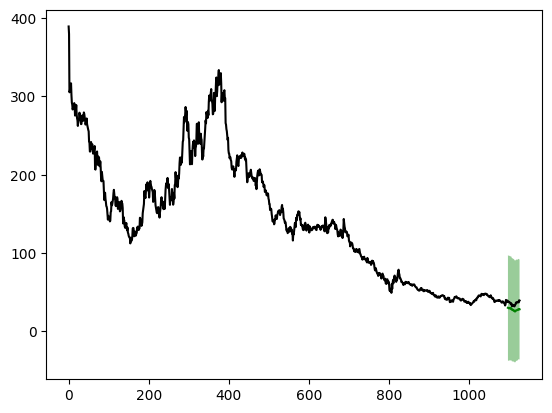

In [15]:
#Dự đoán trên tập train
my_dlm.plotPredictN(N=30, date=my_dlm.n-30)


In [16]:
# Predict on validation data
val_preds, val_vars = my_dlm.predictN(N=val_size)

# Predict on test data
test_preds, test_vars = my_dlm.predictN(N=test_size)
# Predict on train data
train_preds, train_vars = my_dlm.predictN(N=train_size)

In [17]:
# Các giá trị thực tế cho validation, test và train data
val_actual = val_data['Price'].values
test_actual = test_data['Price'].values
train_actual = train_data['Price'].values

In [18]:
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error

# Regression metrics
test_rmse = np.sqrt(np.mean((test_preds - test_actual)**2))
test_mse = mean_squared_error(test_actual, test_preds)
test_mae = mean_absolute_error(test_actual, test_preds)

valid_rmse = np.sqrt(np.mean((val_preds - val_actual)**2))
valid_mse = mean_squared_error(val_actual, val_preds)
valid_mae = mean_absolute_error(val_actual, val_preds)

print('Testing RMSE:', test_rmse)
print('Testing MSE:', test_mse)
print('Testing MAE:', test_mae)

print('Validation RMSE:', valid_rmse)
print('Validation MSE:', valid_rmse)
print('Validation MAE:', valid_mae)

Testing RMSE: 48.15070995821746
Testing MSE: 2318.490869480382
Testing MAE: 46.946337861851994
Validation RMSE: 12.34347536170417
Validation MSE: 12.34347536170417
Validation MAE: 11.901443513154454


In [20]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

In [21]:
# Dự đoán 30 ngày tiếp theo sau tập validation
future_preds, future_vars = my_dlm.predictN(N=30)

# In ra dự đoán cho 30 ngày tiếp theo
print("Predictions for the next 30 days:")
print(future_preds)

Predictions for the next 30 days:
[30.082956640740093, 30.11919069893982, 30.043910345366577, 29.259549440255324, 29.346044509881263, 28.929427032580286, 28.288119055717424, 28.844953064442635, 29.03542615828923, 29.647259966570157, 29.182970001694876, 29.166834825316243, 28.634591488177076, 28.70470933151223, 27.90923832162542, 27.437381663789864, 27.865989493016478, 29.80132768126341, 29.265580111846692, 28.64790210755547, 28.287969504024602, 28.874004171354752, 28.337858453219436, 27.426853237372814, 27.348320327347704, 27.2096164098492, 27.08926682013474, 26.774706991196098, 26.744570824167635, 26.00363336266299]


In [22]:
#Tạo một mảng chứa toàn bộ dữ liệu của tập train, validation và test
allPreds = np.concatenate([train_preds,test_preds, val_preds])


In [23]:
#Tạo mảng index tương ứng với tập allPreds
days = np.arange(0, len(allPreds))


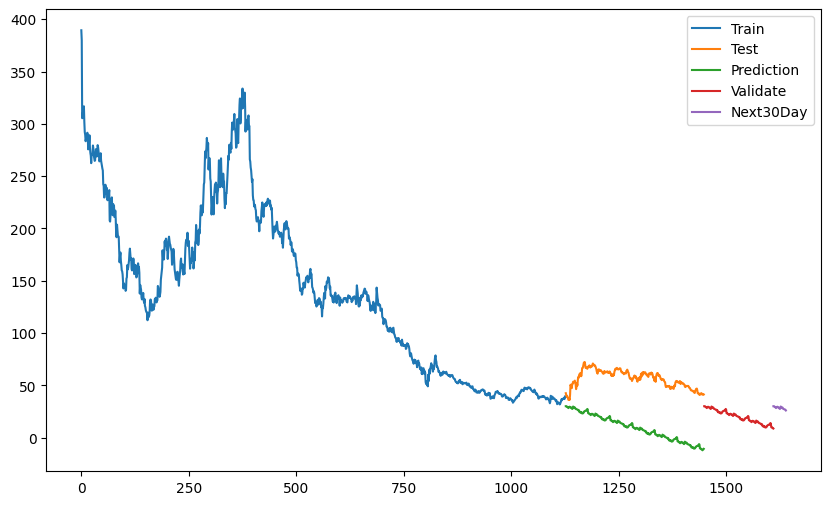

In [24]:
#Vẽ hình
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
#plt.plot(val_data.index, val_data['Price'])
plt.plot(days[len(train_data.index):len(train_data.index)+len(test_preds)], test_preds, label='Prediction')
plt.plot(days[len(train_data.index)+len(test_preds):], val_preds, label='Validate')
plt.plot(last_data,future_preds, label='Next30Day')

#plt.plot(pred_df.index, pred_df['Price'], label='Predicted')
plt.legend(['Train', 'Test', 'Prediction', 'Validate', 'Next30Day'])
plt.show()